## PPT for Analysis on Mental Health using ML : https://www.canva.com/design/DAGxpelwV2k/gY597x2XgJ500jf12zniAg/edit?utm_content=DAGxpelwV2k&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton


In [ ]:
import pandas as pd
df=pd.read_csv('/content/digital_habits_vs_mental_health (1).csv')
df

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,10,9
99996,6.4,3,3.1,5.4,10,5
99997,3.7,3,1.5,8.3,4,10
99998,10.6,2,5.3,7.2,9,9


In [ ]:
# Display the first few rows of the DataFrame
df.head(10)

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10
5,5.5,5,1.8,3.4,10,5
6,4.7,5,1.0,4.7,9,9
7,3.0,5,1.6,6.8,6,10
8,6.0,2,3.1,7.5,5,10
9,4.5,3,2.6,7.8,7,10


In [ ]:
df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,6.003505,2.997820,2.401433,6.988489,6.179590,9.06076
std,1.987073,1.414452,1.079111,1.466330,2.045409,1.27847
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.00000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.00000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.00000
75%,7.300000,4.000000,3.100000,8.000000,8.000000,10.00000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.00000


In [ ]:
# Get a summary of the Dataframe including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(1865)

In [ ]:
# Check for duplicate rows
df.isnull().sum()

,0
screen_time_hours,0
social_media_platforms_used,0
hours_on_TikTok,0
sleep_hours,0
stress_level,0
mood_score,0


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Display descriptive statistics to check for outliers
df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,98135.000000,98135.000000,98135.000000,98135.000000,98135.000000,98135.000000
mean,6.017178,2.998268,2.407408,6.978098,6.196698,9.048607
std,1.991190,1.414731,1.081405,1.469633,2.048782,1.283805
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.000000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.000000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.000000
75%,7.400000,4.000000,3.100000,8.000000,8.000000,10.000000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.000000


Histograms.


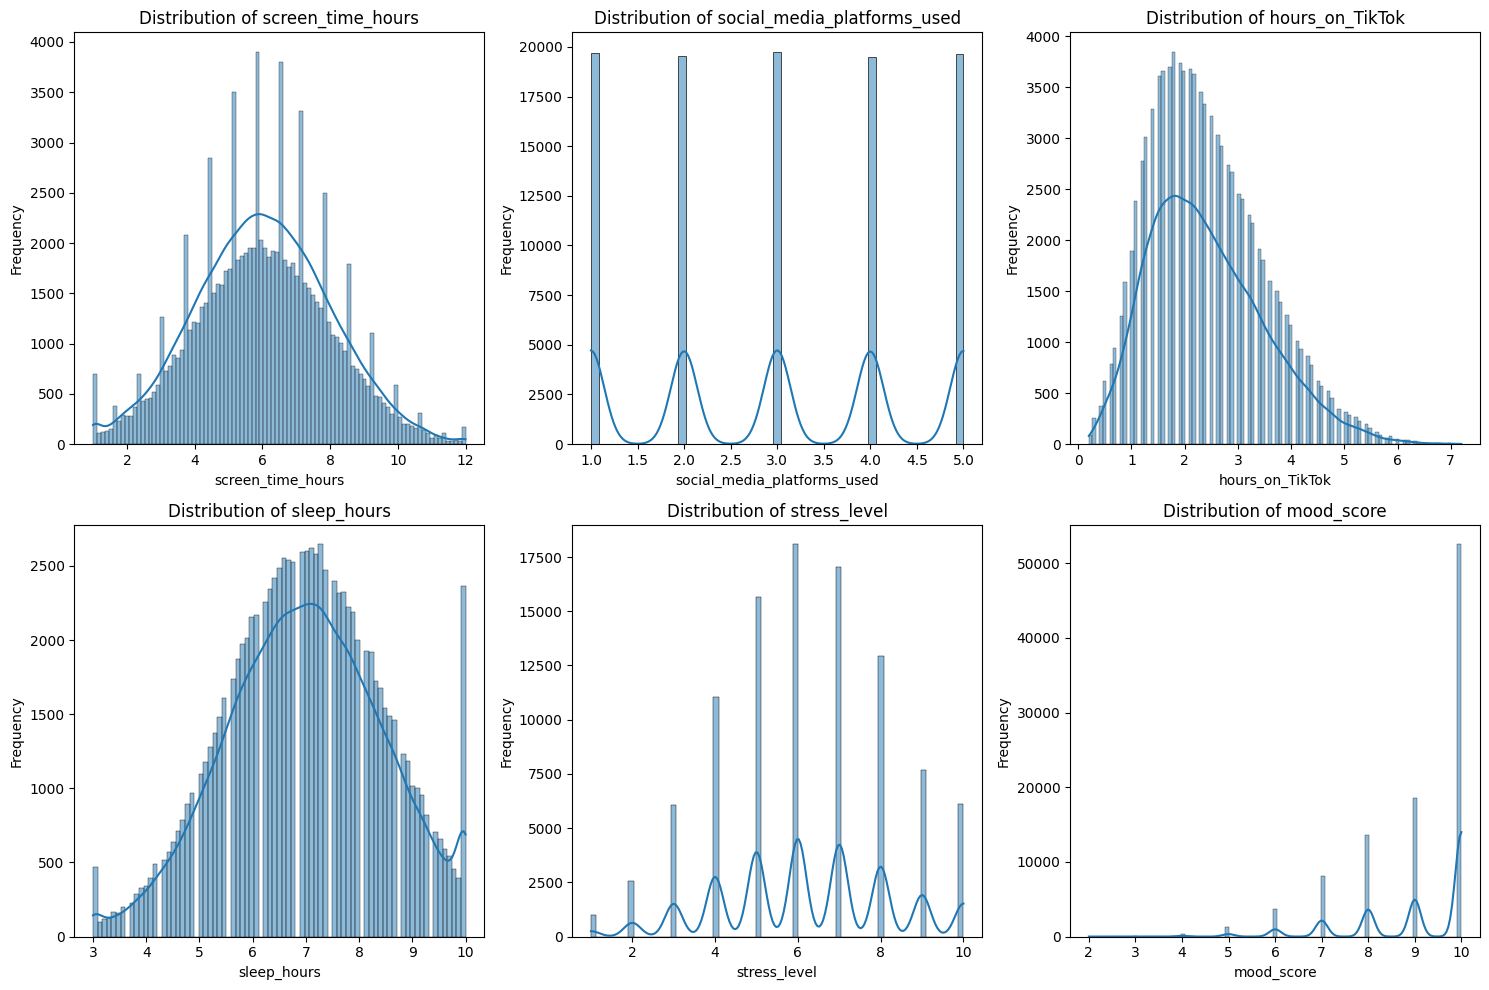

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Visualizing Distributions (Histograms)
print("Histograms.")
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



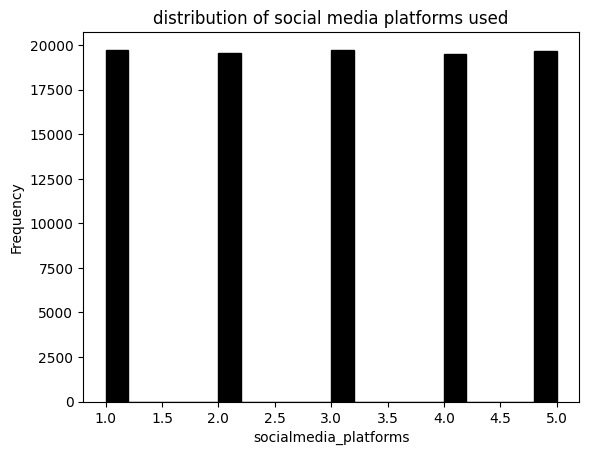

In [ ]:
plt.hist(df['social_media_platforms_used'], bins=20, color='black', edgecolor='black')
plt.xlabel('socialmedia_platforms')
plt.ylabel('Frequency')
plt.title('distribution of social media platforms used')
plt.show()

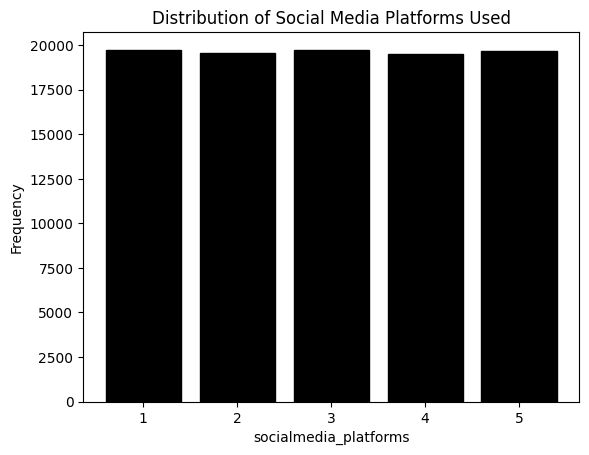

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of each unique value in the 'social_media_platforms_used' column
platform_counts = df['social_media_platforms_used'].value_counts().sort_index()

# Create the bar plot
plt.bar(platform_counts.index, platform_counts.values, color='black', edgecolor='black')
plt.xlabel('socialmedia_platforms')
plt.ylabel('Frequency')
plt.title('Distribution of Social Media Platforms Used')
plt.xticks(platform_counts.index) # Ensure all platform numbers are shown on the x-axis
plt.show()

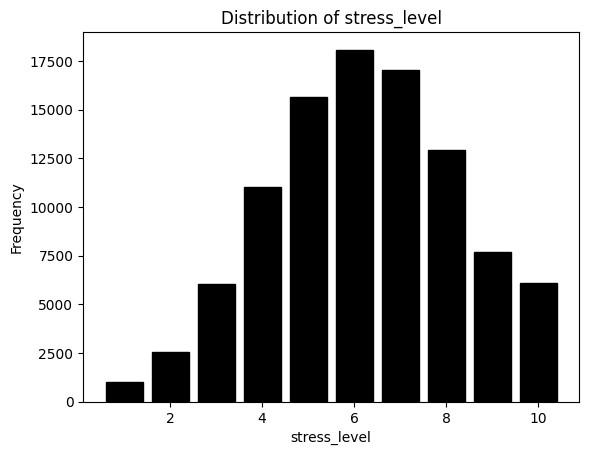

In [ ]:
stress_levels=df['stress_level'].value_counts().sort_index()
plt.bar(stress_levels.index, stress_levels.values,color='black',edgecolor='black')
plt.xlabel('stress_level')
plt.ylabel('Frequency')
plt.title('Distribution of stress_level')
plt.show()

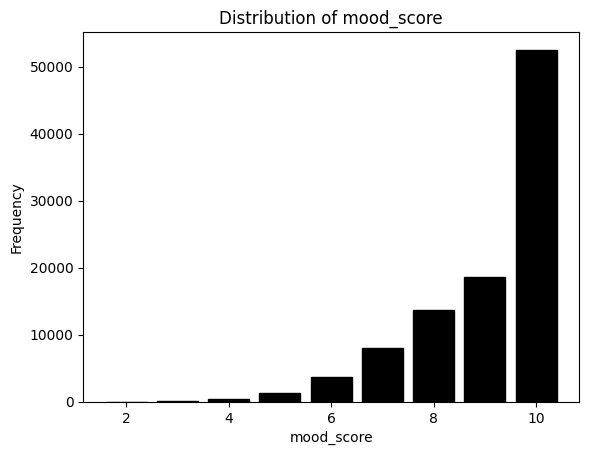

In [ ]:
mood_scores=df['mood_score'].value_counts().sort_index()
plt.bar(mood_scores.index, mood_scores.values,color='black',edgecolor='black')
plt.xlabel('mood_score')
plt.ylabel('Frequency')
plt.title('Distribution of mood_score')
plt.show()

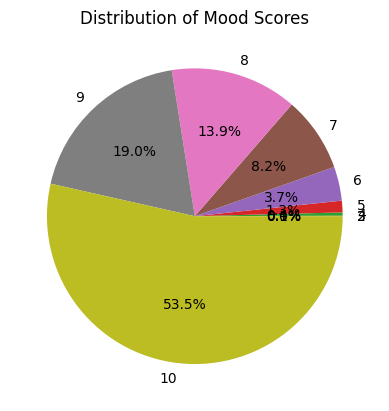

In [ ]:
plt.pie(mood_scores, labels=mood_scores.index, autopct='%1.1f%%')
plt.title('Distribution of Mood Scores')
plt.show()

In [ ]:
mood_scores

,count
mood_score,
2,6
3,50
4,347
5,1248
6,3646
7,8066
8,13624
9,18615
10,52533


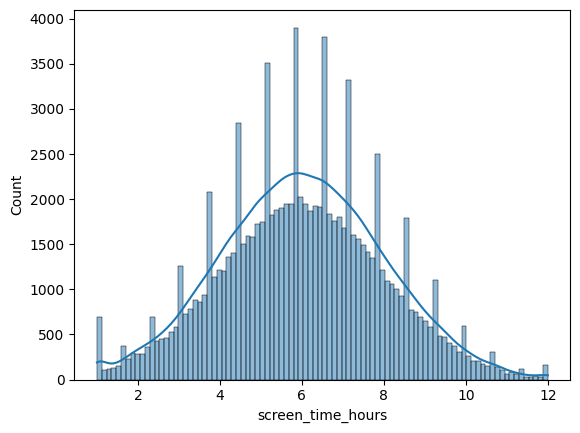

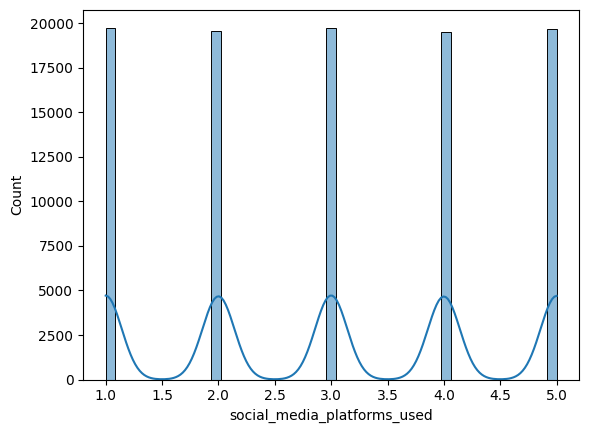

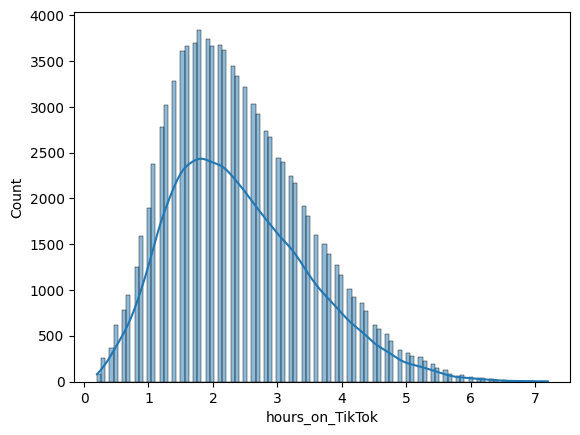

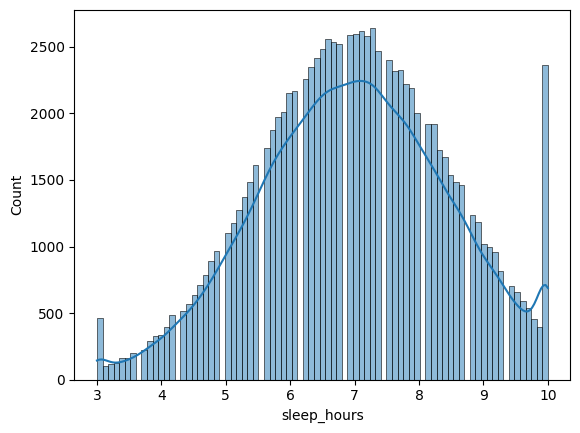

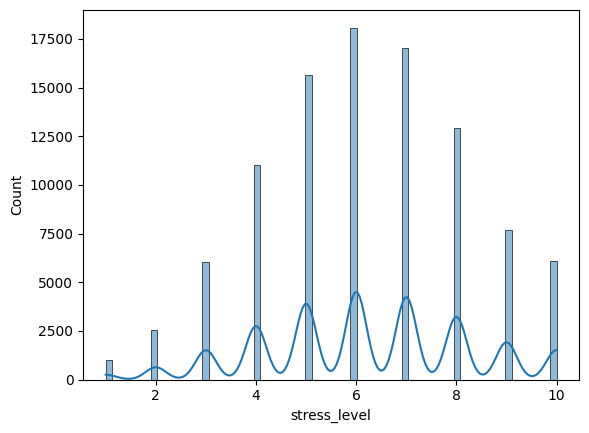

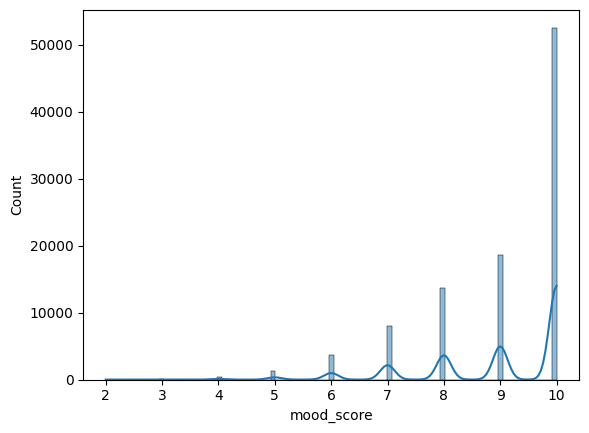

In [ ]:
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.show()

Correlation heatmap


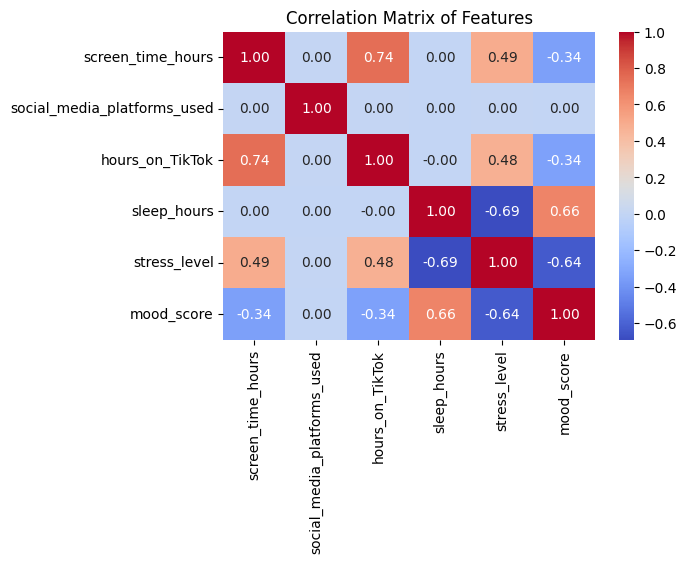

In [ ]:
# 2. Correlation Analysis (Heatmap)
print("Correlation heatmap")
correlation_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

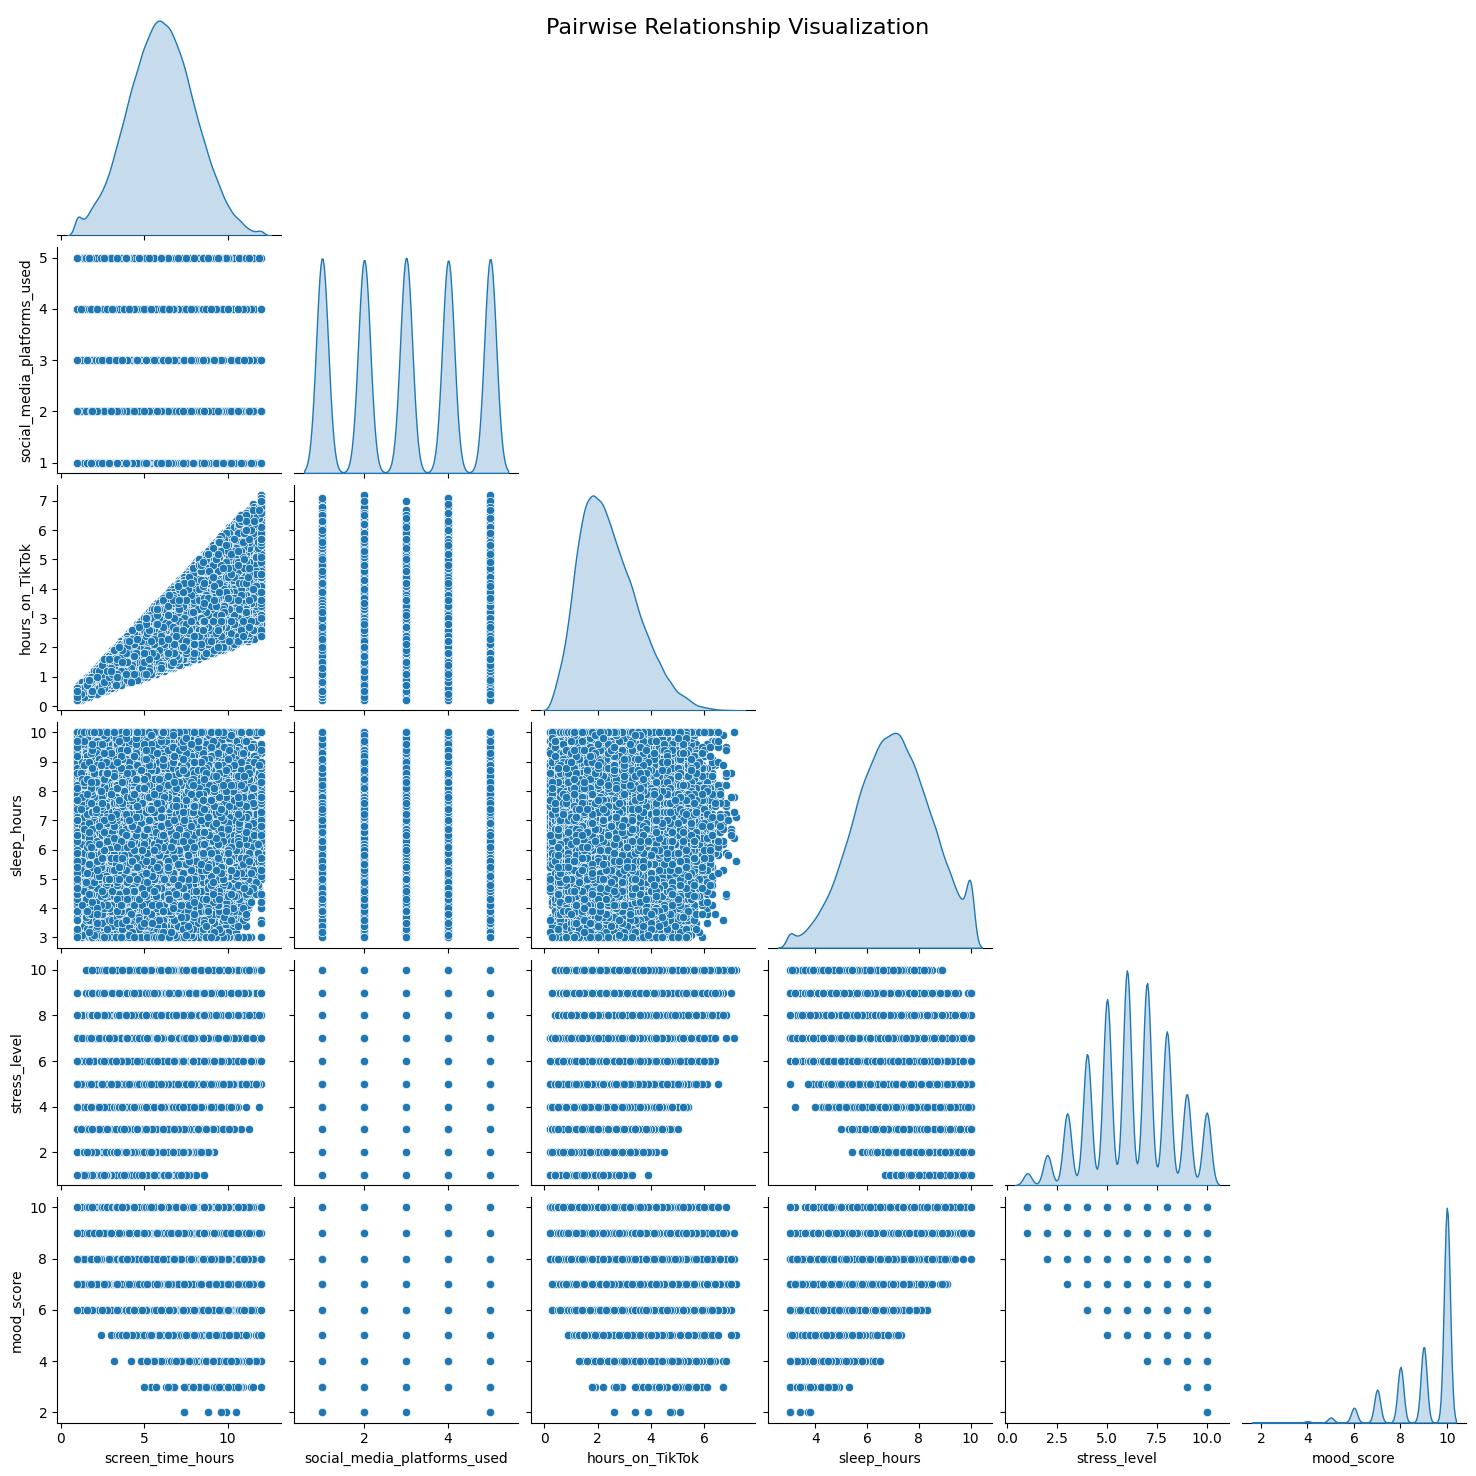

In [ ]:
# 3. Pairwise Relationship Visualization
# Select only the numeric columns for pairplot
numeric_cols = ['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok',
                'sleep_hours', 'stress_level', 'mood_score']

# Pairplot for all numeric variables
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationship Visualization', fontsize=16)
plt.show()

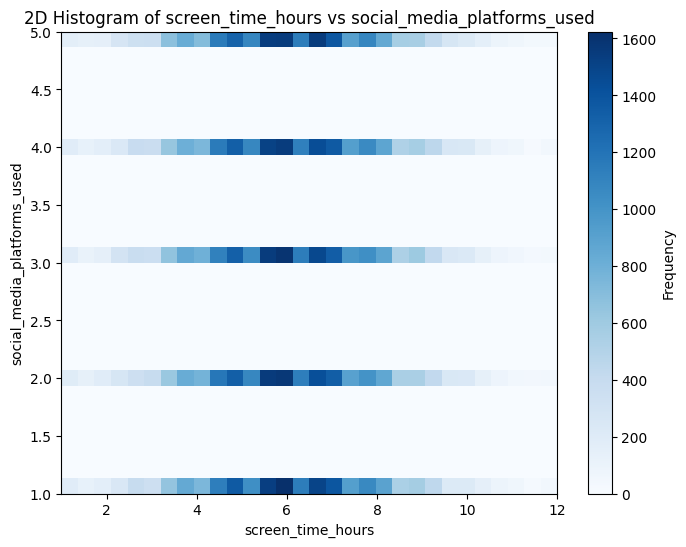

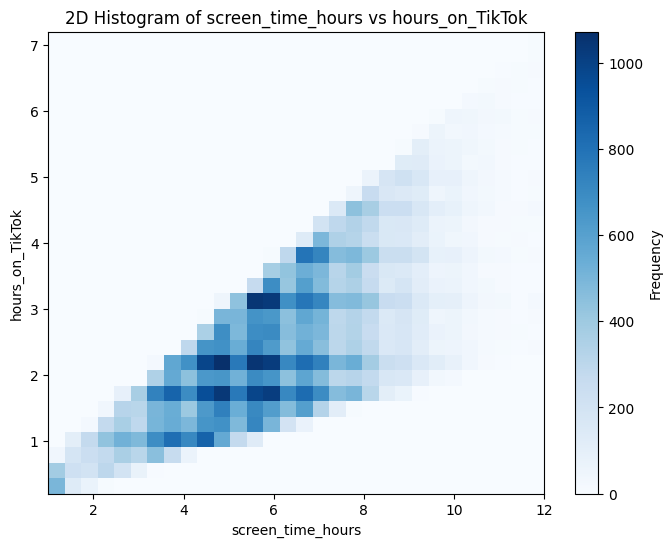

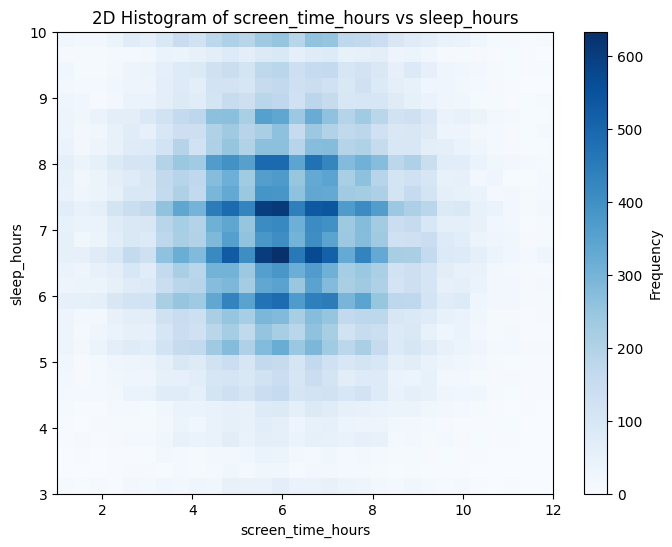

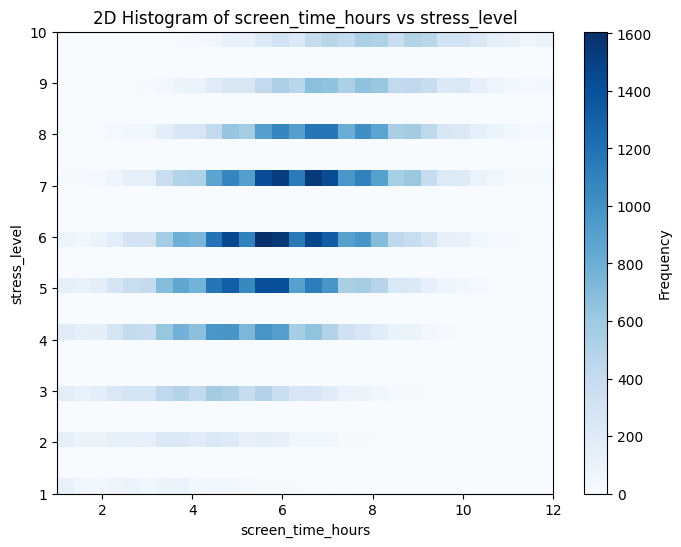

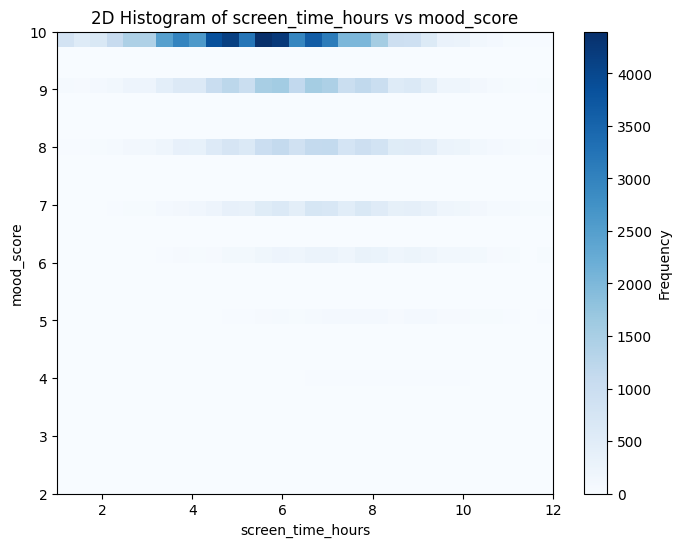

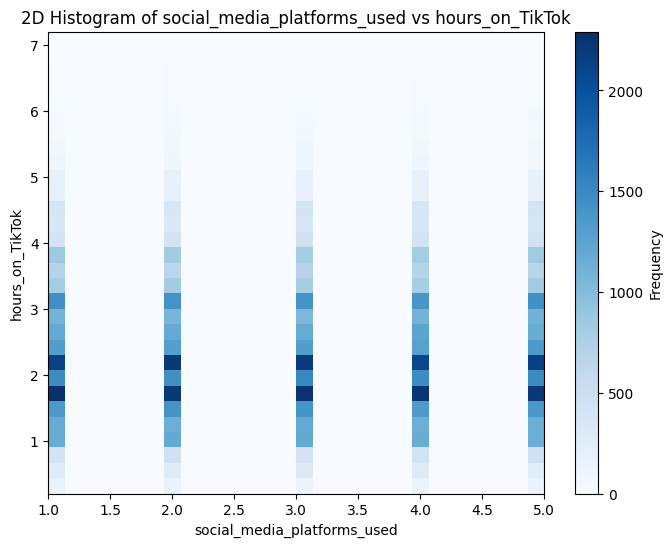

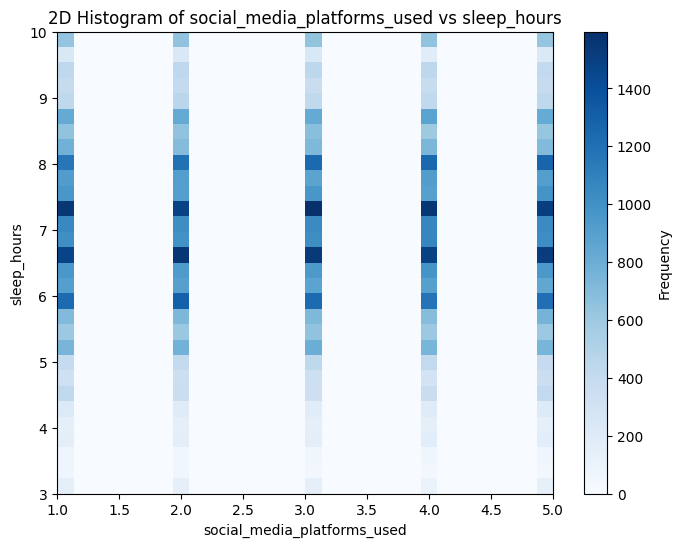

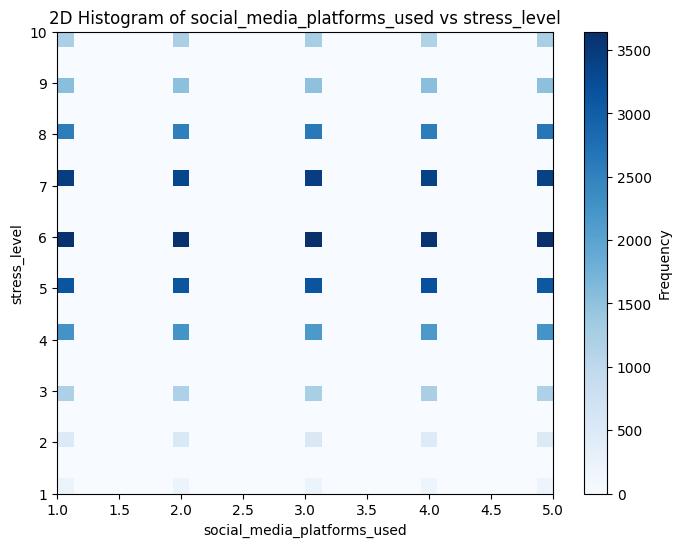

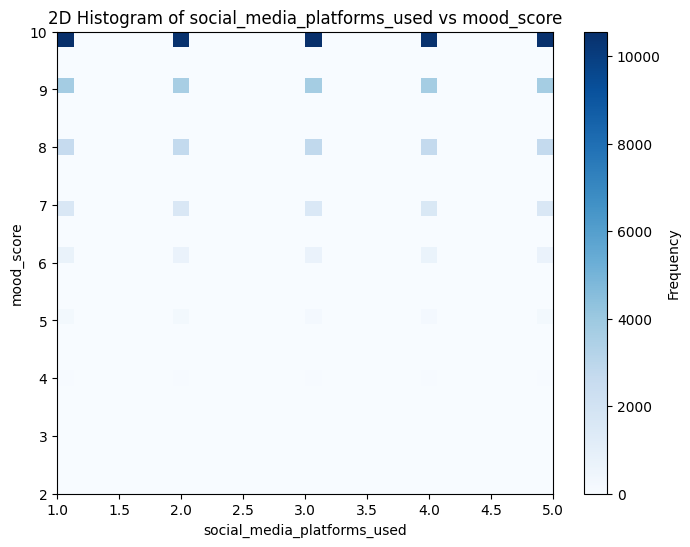

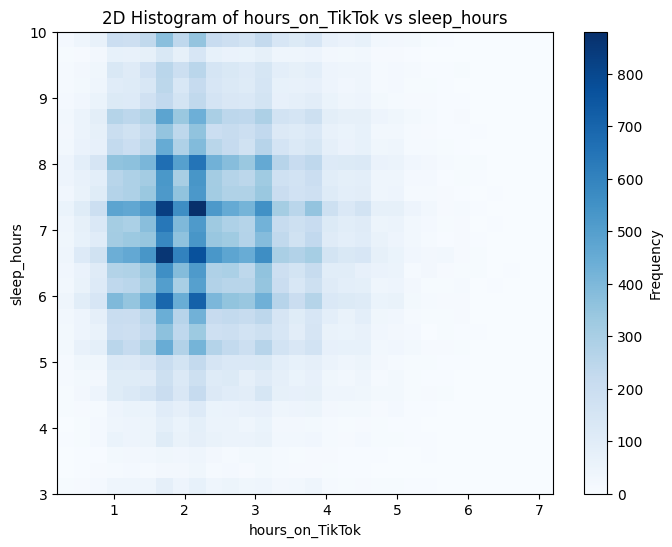

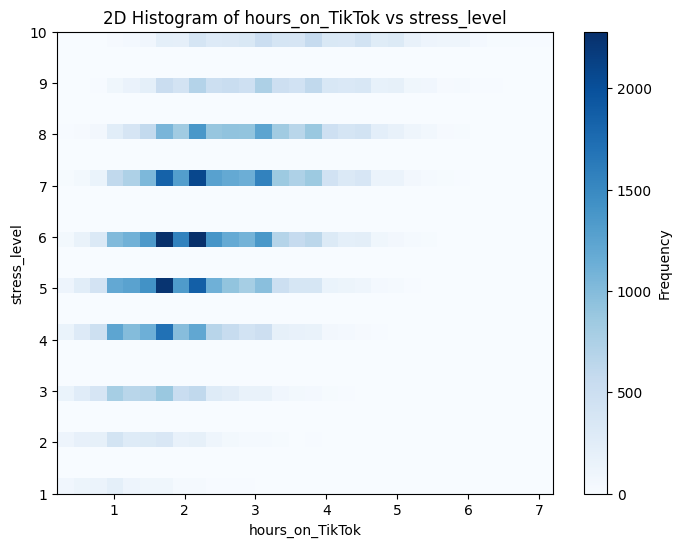

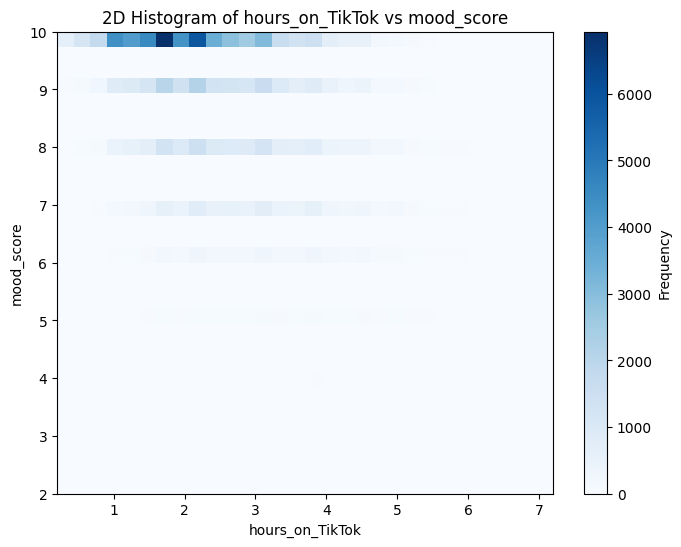

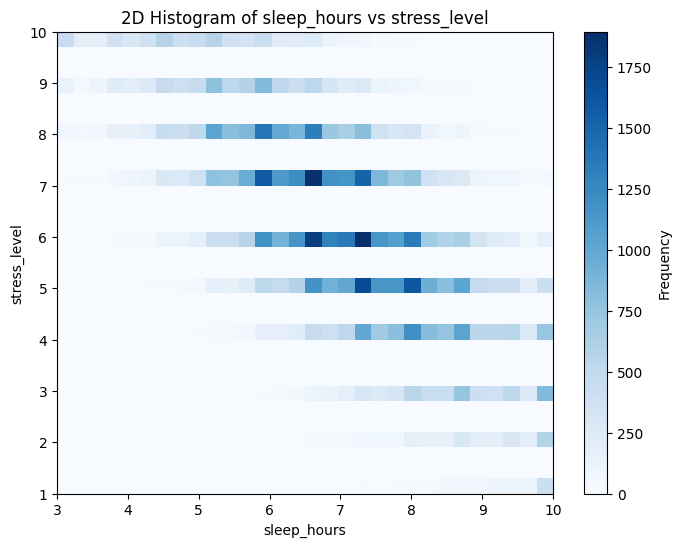

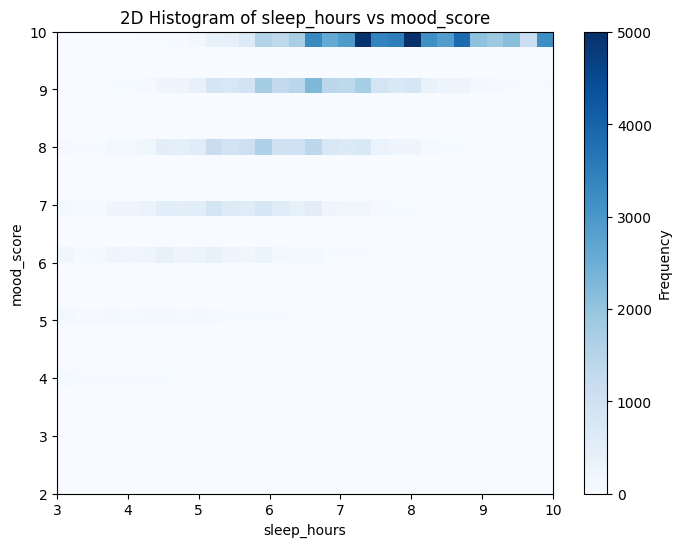

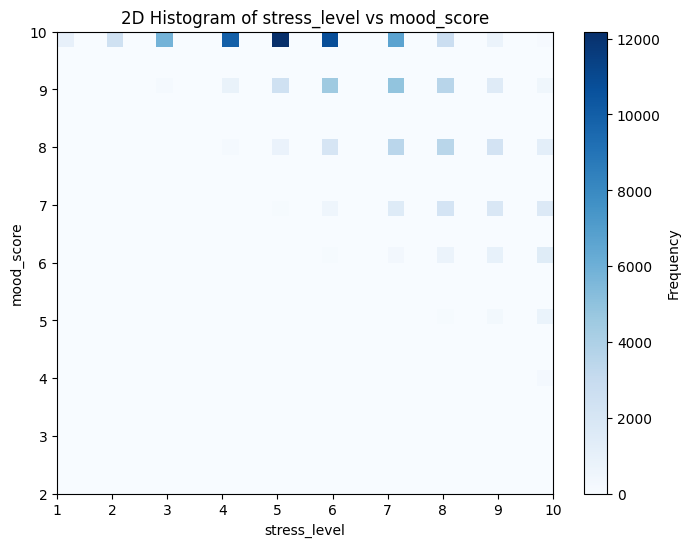

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Get all column names
columns = df.columns

# Generate all pairs of columns
column_pairs = list(itertools.combinations(columns, 2))

# Plot hist2d for each pair of columns
for col1, col2 in column_pairs:
    plt.figure(figsize=(8, 6))
    plt.hist2d(df[col1], df[col2], bins=30, cmap='Blues')
    plt.colorbar(label='Frequency')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'2D Histogram of {col1} vs {col2}')
    plt.show()

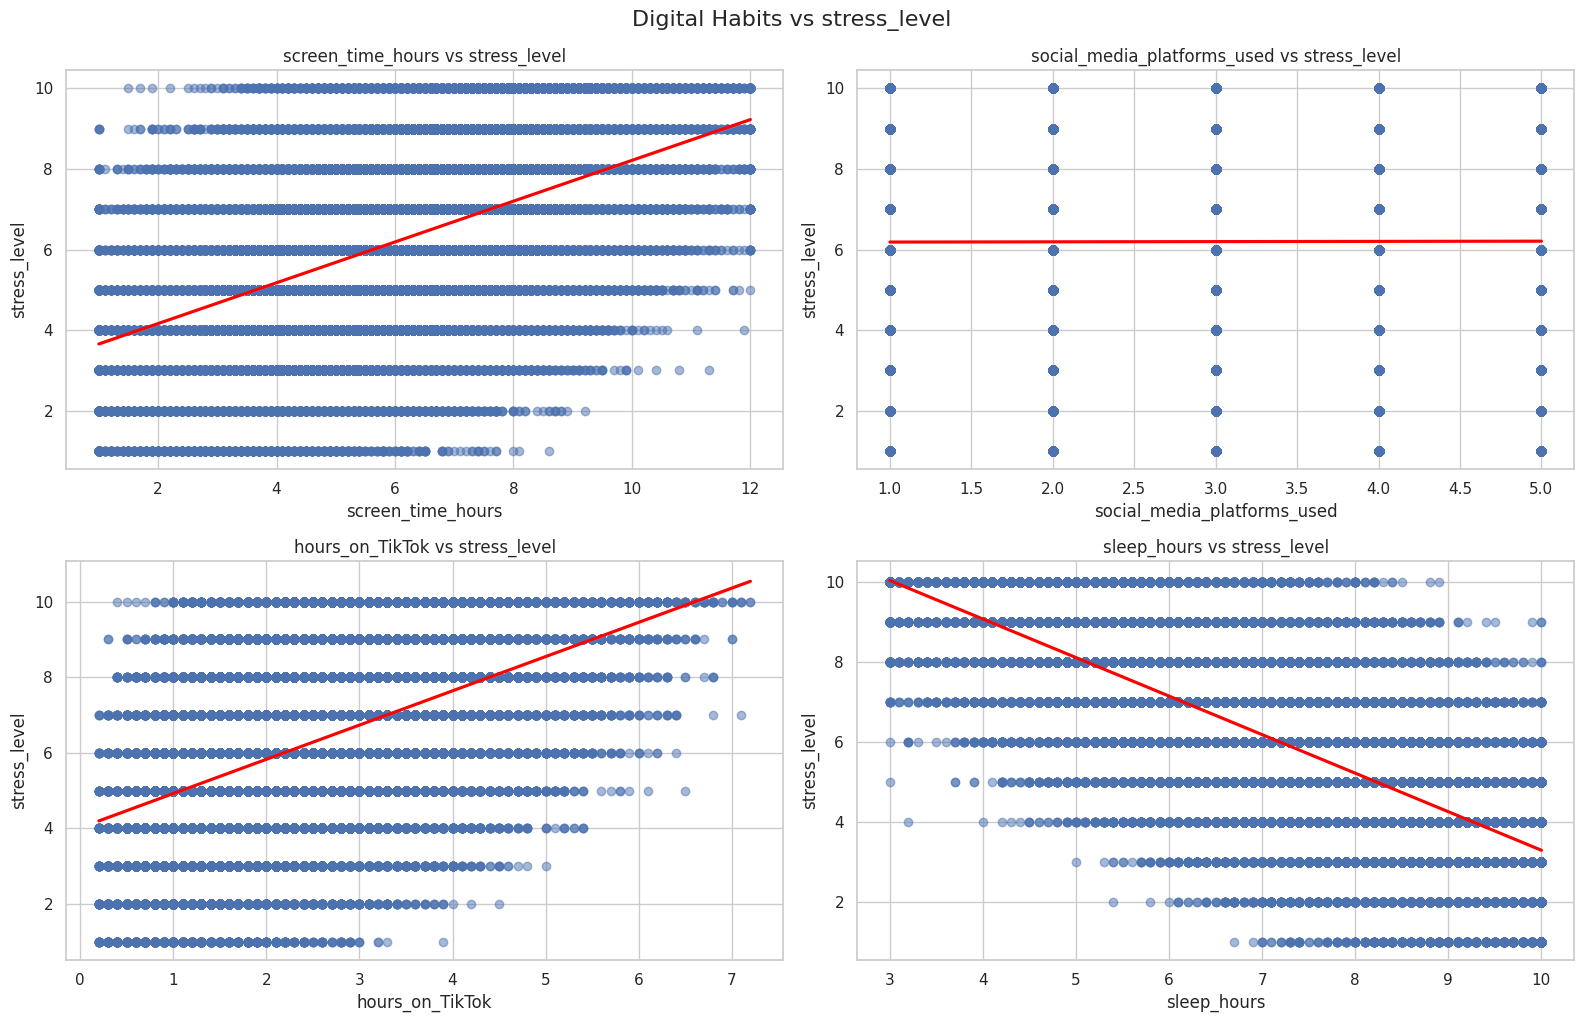

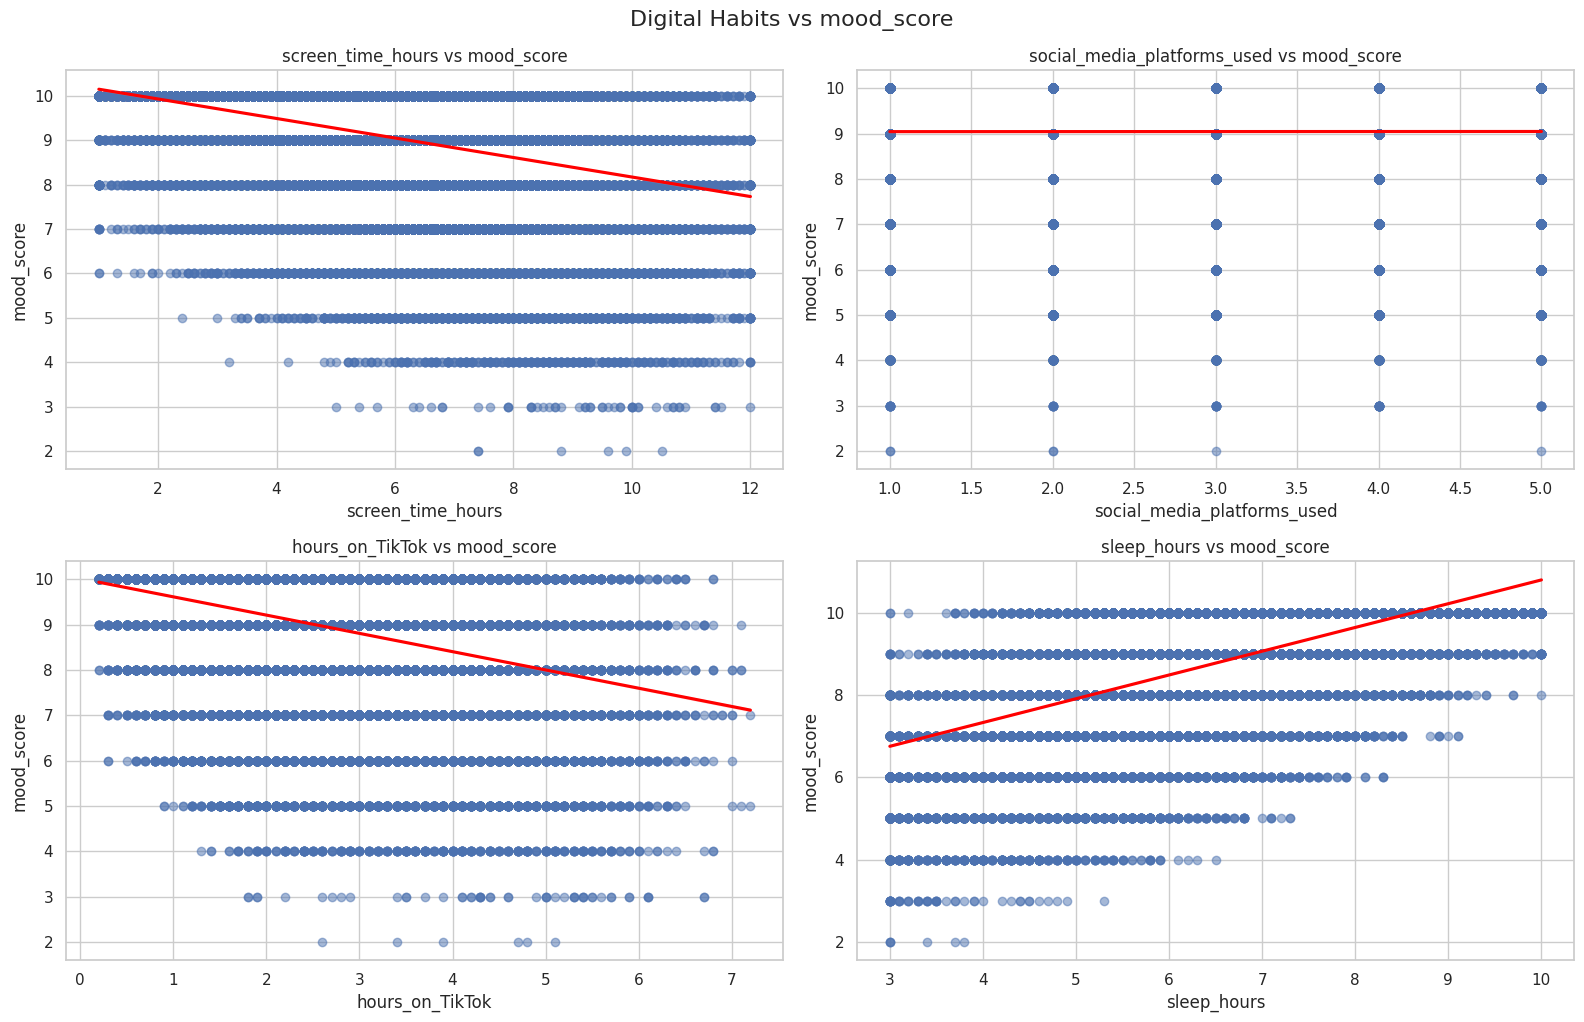

In [ ]:
# 4. Set plot style
sns.set(style="whitegrid")

# Createing subplots for each feature against stress_level and mood_score
features = ['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok', 'sleep_hours']
targets = ['stress_level', 'mood_score']

for target in targets:
    plt.figure(figsize=(16, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 2, i+1)
        sns.regplot(x=df[feature], y=df[target], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
        plt.title(f"{feature} vs {target}")
    plt.tight_layout()
    plt.suptitle(f"Digital Habits vs {target}", fontsize=16, y=1.02)
    plt.show()

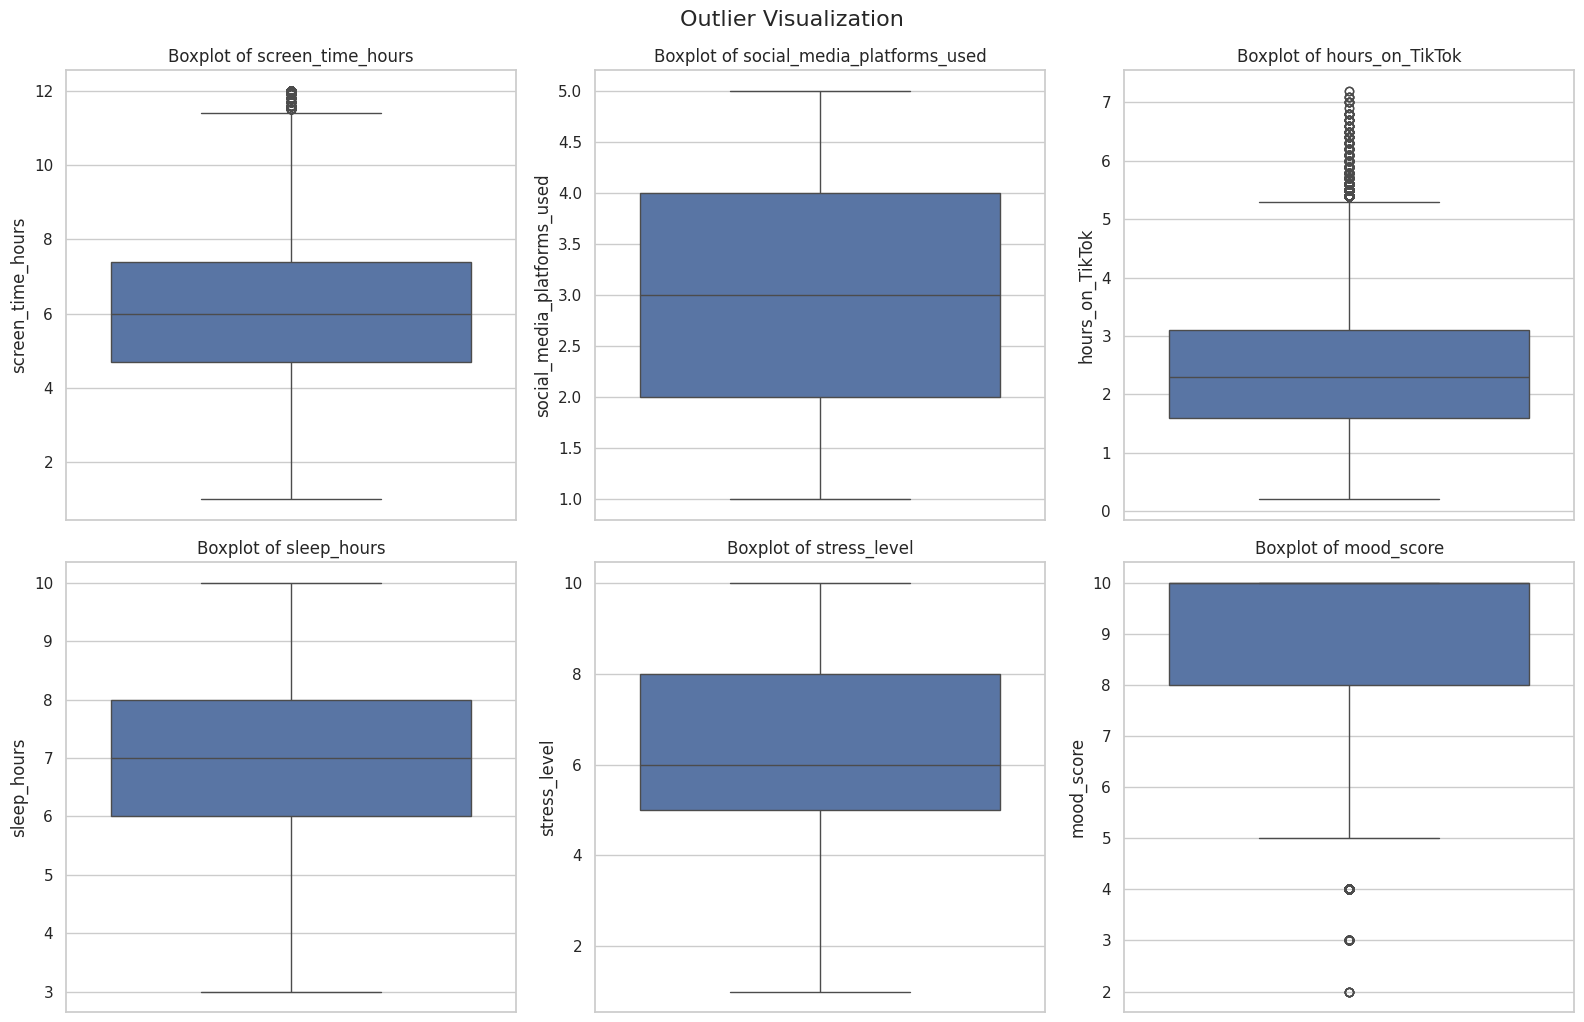

In [ ]:
# 5. Outlier Detection
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.suptitle("Outlier Visualization", fontsize=16, y=1.02)
plt.show()


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 98135 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   screen_time_hours            98135 non-null  float64
 1   social_media_platforms_used  98135 non-null  int64  
 2   hours_on_TikTok              98135 non-null  float64
 3   sleep_hours                  98135 non-null  float64
 4   stress_level                 98135 non-null  int64  
 5   mood_score                   98135 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 5.2 MB
None


In [ ]:
df.columns

Index(['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok',
       'sleep_hours', 'stress_level', 'mood_score'],
      dtype='object')

seperating target veriables and feature variables

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=variance_inflation_factor(df.values,1)
varaience_of_data=pd.DataFrame({'vif':vif},index=df.columns)
varaience_of_data

,vif
screen_time_hours,5.365105
social_media_platforms_used,5.365105
hours_on_TikTok,5.365105
sleep_hours,5.365105
stress_level,5.365105
mood_score,5.365105


In [ ]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('mood_score', axis=1)
y = df['mood_score']

# Apply PCA
pca = PCA(n_components=5) # You can adjust n_components as needed
X_pca = pca.fit_transform(X)

# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

In [ ]:


# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=46)

print("Shape of original features:", X.shape)
print("Shape of PCA transformed features:", X_pca.shape)
print("Shape of resampled features:", X_resampled.shape)
print("Shape of resampled target:", y_resampled.shape)

Shape of original features: (98135, 5)
Shape of PCA transformed features: (98135, 5)
Shape of resampled features: (472797, 5)
Shape of resampled target: (472797,)


In [ ]:
y_test

,mood_score
254204,4
72102,10
129001,2
21782,9
235384,4
...,...
278823,5
14669,9
37550,8
290156,5


LINEAR REGRESSOR

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

In [ ]:
linear

,Predicted,Actual
254204,6.086073,4
72102,8.666295,10
129001,2.817529,2
21782,7.819378,9
235384,5.423763,4
...,...,...
278823,4.112185,5
14669,8.519094,9
37550,6.978523,8
290156,4.063873,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8272507052725301

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.8776946496052235

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.1556388444032297

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.1959378055010314

In [ ]:
model.coef_

array([-0.54307597,  0.40660662,  0.03176733,  0.63457437, -0.9748313 ])

In [ ]:
model.intercept_

np.float64(8.751893178357358)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


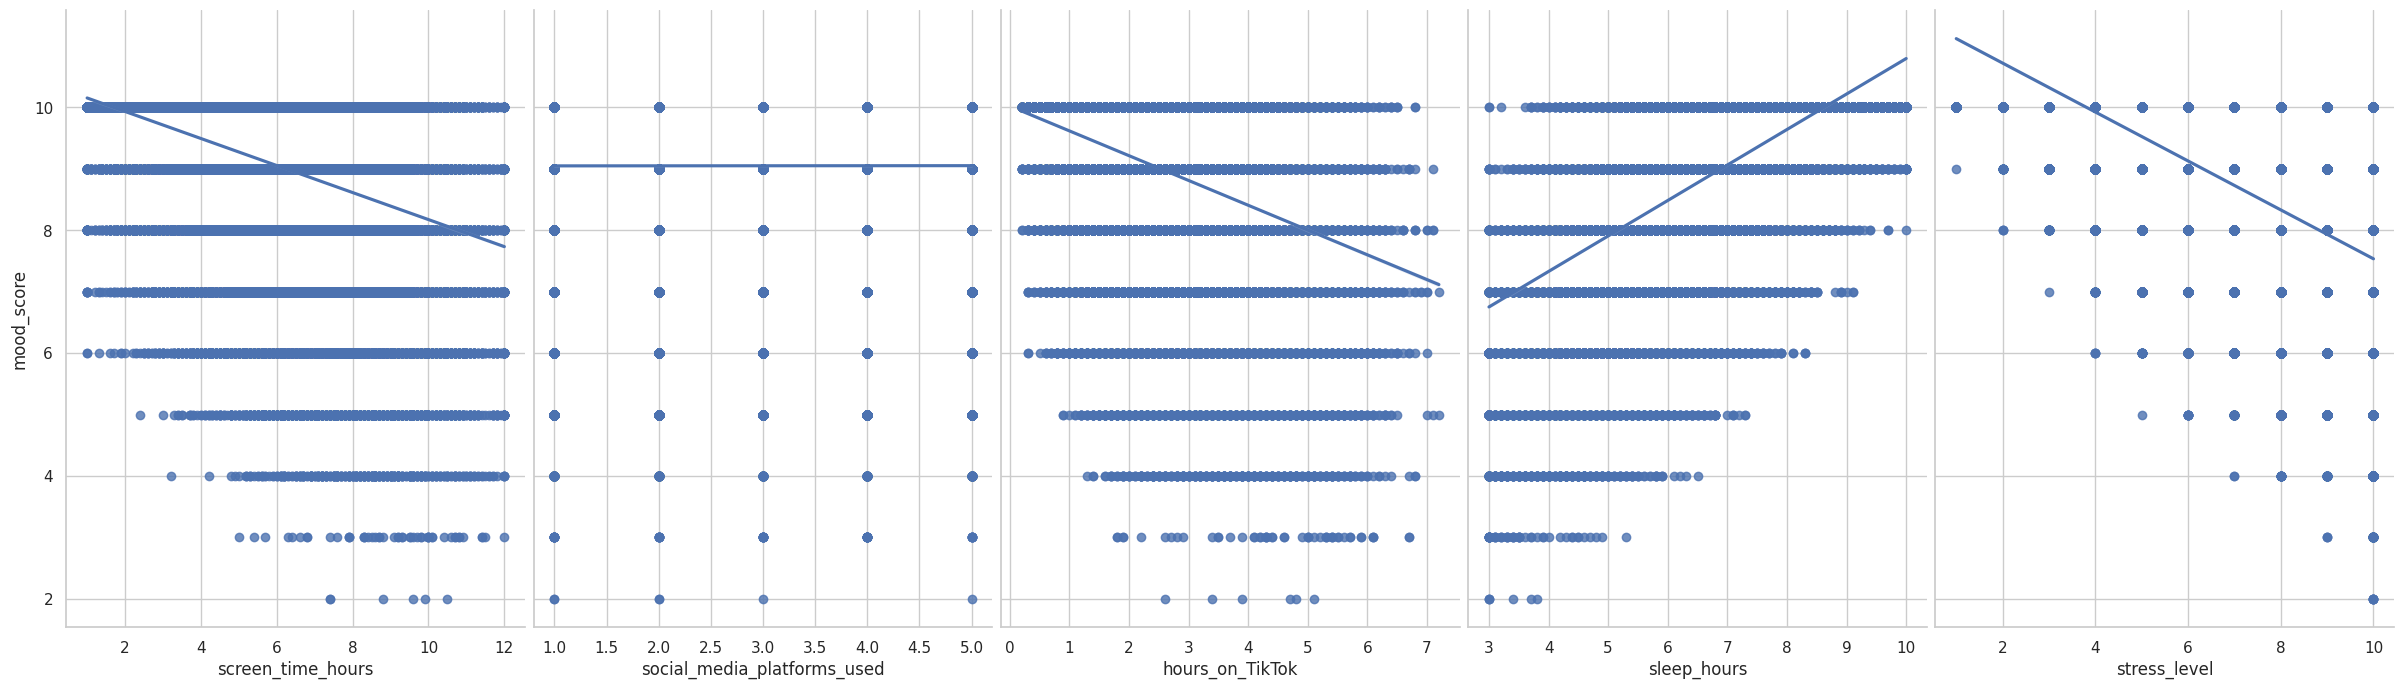

In [ ]:
import seaborn as sns
sns.pairplot(df, x_vars=['screen_time_hours',
          'social_media_platforms_used',
          'hours_on_TikTok',
          'sleep_hours',
          'stress_level'], y_vars='mood_score', size=7, aspect=0.7, kind='reg')

# KNN_Regressor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([4. , 8.2, 2. , ..., 7. , 5. , 2. ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred.flatten(),'Actual':y_test})
knn

,Predicted,Actual
254204,4.0,4
72102,8.2,10
129001,2.0,2
21782,9.2,9
235384,4.0,4
...,...,...
278823,5.0,5
14669,9.6,9
37550,7.0,8
290156,5.0,5


# Evaluation Metric



In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9559685032135772

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.2629878736604625

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.2945569655950366

In [ ]:
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5427310250898105)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.03463525859676452


3.463525859676452

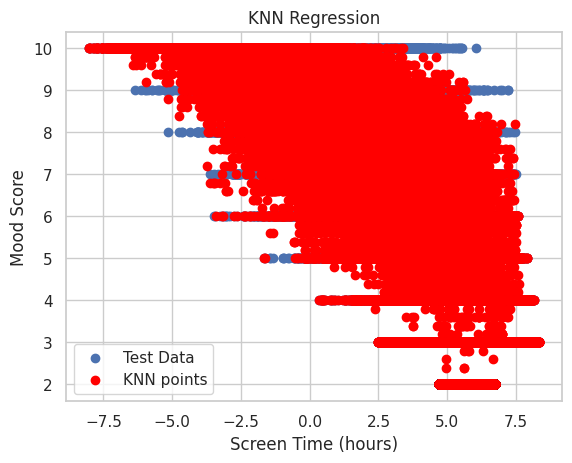

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:, 0], y_test, label='Test Data') # Access the first column (screen_time_hours)
plt.scatter(x_test[:, 0], y_pred, color='red', linewidth=1, label='KNN points') # Access the first column
plt.xlabel('Screen Time (hours)')
plt.ylabel('Mood Score')
plt.title('KNN Regression')
plt.legend()
plt.show()

# SVM_Regressor


In [ ]:
from sklearn.svm import LinearSVR

model = LinearSVR(max_iter=10000, random_state=42)
model.fit(x_train, y_train)


LinearSVR(max_iter=10000, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([6.19690301, 8.66916876, 2.66268199, ..., 6.86146445, 4.04557887,
       2.90847554])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred.flatten(),'Actual':y_test})
svm

,Predicted,Actual
254204,6.196903,4
72102,8.669169,10
129001,2.662682,2
21782,7.809995,9
235384,5.507813,4
...,...,...
278823,3.975396,5
14669,8.528845,9
37550,6.861464,8
290156,4.045579,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8263803242263359

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.8752877411843175

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.8752877411843175

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.0777111959352312)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.19163398189956707


19.163398189956705

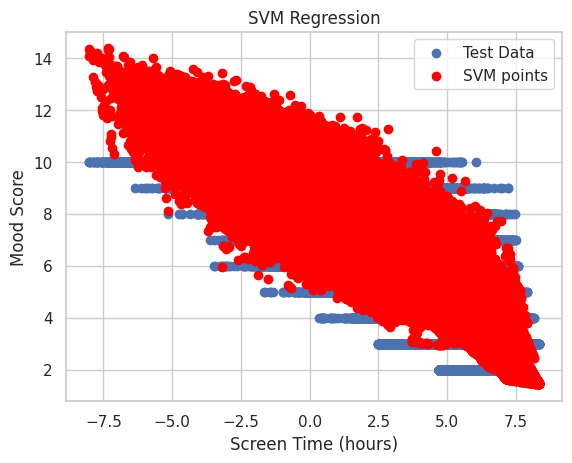

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:,0], y_test, label='Test Data')
plt.scatter(x_test[:,0], y_pred, color='red', linewidth=1, label='SVM points')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Mood Score')
plt.title('SVM Regression')
plt.legend()
plt.show()

Decision Tree

Model Building - Decision Tree Regression


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([4., 9., 2., ..., 6., 5., 2.])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
254204,4.0,4
72102,9.0,10
129001,2.0,2
21782,8.0,9
235384,4.0,4
...,...,...
278823,5.0,5
14669,10.0,9
37550,6.0,8
290156,5.0,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9202563325613172

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.29416478661402523

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.5334602368866328

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.7303836230958584)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.03965396679916561


3.9653966799165605

In [ ]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree regressor.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Fri

In [ ]:
# Create Decision Tree Regressor object
clf = DecisionTreeRegressor(criterion="squared_error", max_depth=3) # 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'

# Train Decision Tree Regressor
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.7424800455729306

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

1.041752267880185

In [ ]:
mean_squared_error(y_test,y_pred)

1.7227280899430946

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.3125273673120474)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.22302940259848328


22.302940259848327

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=50,          # fewer trees
    max_depth=5,              # limit depth
    criterion='squared_error',# faster criterion
    n_jobs=-1                 # use all CPU cores
)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [ ]:
y_pred

array([6.72408017, 9.46808561, 2.66953504, ..., 6.82167378, 3.62377104,
       2.66953504])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
254204,6.724080,4
72102,9.468086,10
129001,2.669535,2
21782,7.821719,9
235384,5.758109,4
...,...,...
278823,3.623771,5
14669,8.543769,9
37550,6.821674,8
290156,3.623771,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8328168446575326

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.8519807466880978

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.1184031098271814

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.0575457956169942)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.17628201670608945


17.628201670608945

In [ ]:
from sklearn.ensemble import RandomForestRegressor
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tru

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Faster version
clf = RandomForestRegressor(
    n_estimators=50,          # fewer trees
    criterion='squared_error',# faster criterion
    max_depth=8,              # shallower trees
    n_jobs=-1                 # use all CPU cores
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [ ]:
r2_score(y_test,y_pred)

0.883655743679052

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.6709979952711641

In [ ]:
mean_squared_error(y_test,y_pred)

0.7783067487471107

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.8822169510653889)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.12844960845464523


12.844960845464524

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
model = BaggingRegressor()

In [ ]:
model.fit(x_train, y_train)

BaggingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([4. , 9.1, 2. , ..., 7.8, 5. , 2. ])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
254204,4.0,4
72102,9.1,10
129001,2.0,2
21782,8.3,9
235384,4.1,4
...,...,...
278823,5.0,5
14669,9.7,9
37550,7.8,8
290156,5.0,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9534888092222995

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.3004066290879953

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.3111453441645388

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5578040374222284)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.04171179366911634


4.171179366911634

gradientboosting regressor

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.951441526463613

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.33724113776427683

In [ ]:
mean_squared_error(y_test,y_pred)

0.32484102659929226

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.5699482665990767)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.04908161410071394


4.908161410071394

boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([6.84708387, 8.45199321, 3.8426528 , ..., 7.16533443, 4.53553564,
       3.81037453])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
254204,6.847084,4
72102,8.451993,10
129001,3.842653,2
21782,7.848082,9
235384,5.887254,4
...,...,...
278823,4.963284,5
14669,8.495662,9
37550,7.165334,8
290156,4.535536,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7628249687884583

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

1.076957225938709

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.5866269059043603

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.2596137923603252)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.2663363202353532


26.63363202353532

x-gb00st

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([5.2934747, 9.115719 , 2.0482595, ..., 7.382371 , 4.4006467,
       2.0248816], dtype=float32)

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

,Predicted,Actual
254204,5.293475,4
72102,9.115719,10
129001,2.048259,2
21782,8.204273,9
235384,4.783217,4
...,...,...
278823,4.593221,5
14669,8.911463,9
37550,7.382371,8
290156,4.400647,5


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9164074063301086

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

0.5279383063316345

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.559208333492279

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.7478023358430215)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.08848653733730316


8.848653733730316

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.9068156480789185

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.5767793655395508

In [ ]:
mean_squared_error(y_test,y_pred)

0.6233744025230408

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.7895406275316305)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)
mape = mape * 100
mape

0.10178722441196442


10.178722441196442

ANN

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 5, verbose=1)

Epoch 1/5
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1.6059 - mae: 1.6059
Epoch 2/5
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.8838 - mae: 0.8838
Epoch 3/5
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8831 - mae: 0.8831
Epoch 4/5
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.8827 - mae: 0.8827
Epoch 5/5
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.8823 - mae: 0.8823


In [ ]:
model.evaluate(x_test, y_test)

4433/4433 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8807 - mae: 0.8807


[0.8807099461555481, 0.8807099461555481]

In [ ]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

Text(0.5, 0, 'epochs')

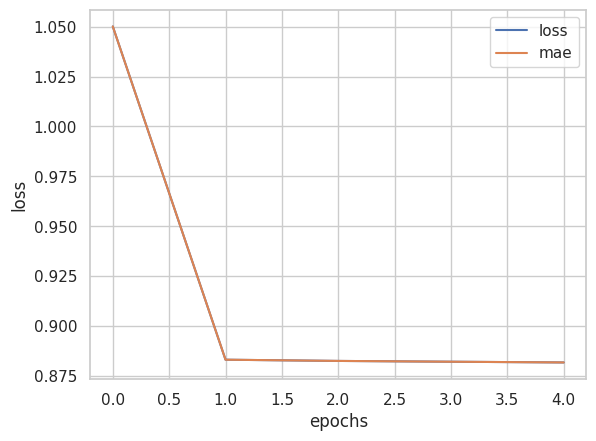

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
    ]
)


# STEP1: Fit the model

history= model1.fit(x_train, y_train, epochs= 5, verbose=0)

In [ ]:
model1.evaluate(x_test, y_test)

4433/4433 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.7251 - mae: 0.7251 - mape: 14.1297 - mse: 0.9164


[0.7253608107566833,
 0.7253608107566833,
 0.9146610498428345,
 14.133100509643555]

Text(0.5, 0, 'epochs')

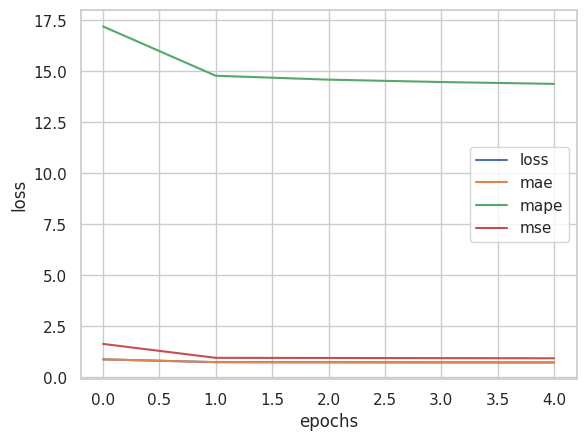

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model

model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[ tf.keras.metrics.MeanAbsoluteError(name="mae")
    ]
)

# STEP1: Fit the model

history= model2.fit(x_train, y_train, epochs= 10)

Epoch 1/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.3264 - mae: 1.3264
Epoch 2/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.7189 - mae: 0.7189
Epoch 3/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.7054 - mae: 0.7054
Epoch 4/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.6991 - mae: 0.6991
Epoch 5/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.6942 - mae: 0.6942
Epoch 6/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.6897 - mae: 0.6897
Epoch 7/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.6836 - mae: 0.6836
Epoch 8/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.6778 - mae: 0.6778
Epoch 9/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.6735 - mae: 0.6735
Epoch 10/10
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.6646 - mae: 0.6646


Finally, let's visualize the training progress of this model.

Let's evaluate the performance of this sixth model.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), # Adding dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model
model6.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)

# STEP3: Fit the model
history6 = model6.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 1.0370 - mae: 1.0370 - mse: 2.3541 - rmse: 1.4339
Epoch 2/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.6873 - mae: 0.6873 - mse: 0.8950 - rmse: 0.9460
Epoch 3/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.6586 - mae: 0.6586 - mse: 0.8572 - rmse: 0.9258
Epoch 4/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.6457 - mae: 0.6457 - mse: 0.8416 - rmse: 0.9174
Epoch 5/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.6363 - mae: 0.6363 - mse: 0.8303 - rmse: 0.9112
Epoch 6/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.6319 - mae: 0.6319 - mse: 0.8260 - rmse: 0.9088
Epoch 7/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.6270 - mae: 0.6270 - mse: 0.8214 - rmse: 0.9063
Epoch 8/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.6234 - mae: 0.6234 - mse: 0.8176 - rmse: 0.9042
Epoch 9/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.6211 - mae: 0

In [ ]:
model6.evaluate(x_test, y_test)

4433/4433 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.6210 - mae: 0.6210 - mse: 0.8075 - rmse: 0.8986


[0.6207419633865356,
 0.6207419633865356,
 0.8062644600868225,
 0.8979222774505615]

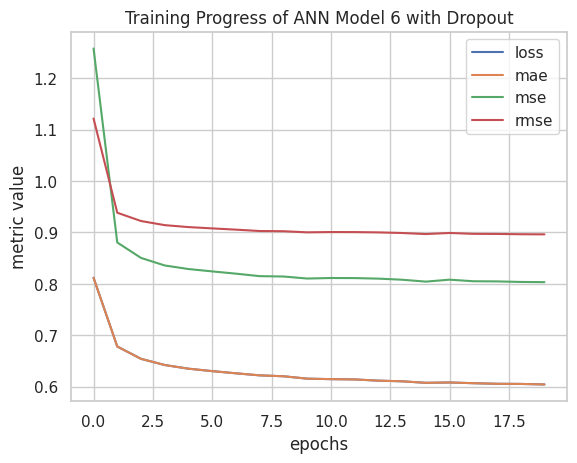

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history6.history).plot()
plt.ylabel("metric value")
plt.xlabel("epochs")
plt.title("Training Progress of ANN Model 6 with Dropout")
plt.show()

Here is another ANN model using dropout for regularization.

Let's visualize the training progress of this model.

Now let's evaluate the performance of this new model.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh'), # Using tanh activation
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model
model5.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), # Using RMSprop optimizer
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)

# STEP3: Fit the model
history5 = model5.fit(x_train, y_train, epochs=25, verbose=1) # Increased epochs

Epoch 1/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 2.2225 - mae: 0.9570 - mse: 2.2225 - rmse: 1.3701
Epoch 2/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.8329 - mae: 0.6955 - mse: 0.8329 - rmse: 0.9126
Epoch 3/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.7774 - mae: 0.6615 - mse: 0.7774 - rmse: 0.8817
Epoch 4/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.7485 - mae: 0.6428 - mse: 0.7485 - rmse: 0.8651
Epoch 5/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.7305 - mae: 0.6318 - mse: 0.7305 - rmse: 0.8547
Epoch 6/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.7171 - mae: 0.6237 - mse: 0.7171 - rmse: 0.8468
Epoch 7/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.7067 - mae: 0.6167 - mse: 0.7067 - rmse: 0.8406
Epoch 8/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.6983 - mae: 0.6105 - mse: 0.6983 - rmse: 0.8356
Epoch 9/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.6916 - mae: 0

In [ ]:
model5.evaluate(x_test, y_test)

4433/4433 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.6278 - mae: 0.5607 - mse: 0.6278 - rmse: 0.7924


[0.6252968907356262,
 0.5599506497383118,
 0.6252968907356262,
 0.7907571792602539]

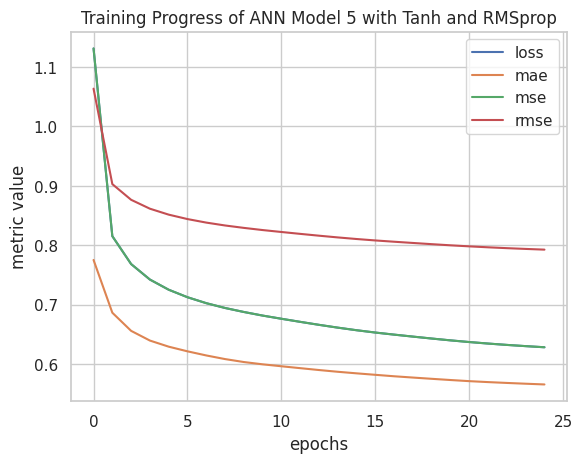

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history5.history).plot()
plt.ylabel("metric value")
plt.xlabel("epochs")
plt.title("Training Progress of ANN Model 5 with Tanh and RMSprop")
plt.show()

Let's implement another ANN model using a different optimizer and activation function.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), # Adding dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model
model6.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)

# STEP3: Fit the model
history6 = model6.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 1.0073 - mae: 1.0073 - mse: 2.2021 - rmse: 1.3934
Epoch 2/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.6775 - mae: 0.6775 - mse: 0.8771 - rmse: 0.9365
Epoch 3/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.6482 - mae: 0.6482 - mse: 0.8427 - rmse: 0.9180
Epoch 4/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.6358 - mae: 0.6358 - mse: 0.8285 - rmse: 0.9102
Epoch 5/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.6282 - mae: 0.6282 - mse: 0.8202 - rmse: 0.9057
Epoch 6/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.6233 - mae: 0.6233 - mse: 0.8130 - rmse: 0.9017
Epoch 7/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.6186 - mae: 0.6186 - mse: 0.8099 - rmse: 0.9000
Epoch 8/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.6169 - mae: 0.6169 - mse: 0.8112 - rmse: 0.9006
Epoch 9/20
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.6118 - mae: 0

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh'), # Using tanh activation
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model
model5.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), # Using RMSprop optimizer
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)

# STEP3: Fit the model
history5 = model5.fit(x_train, y_train, epochs=25, verbose=1) # Increased epochs

Epoch 1/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 2.3601 - mae: 0.9742 - mse: 2.3601 - rmse: 1.4077
Epoch 2/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.8341 - mae: 0.6952 - mse: 0.8341 - rmse: 0.9133
Epoch 3/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.7790 - mae: 0.6627 - mse: 0.7790 - rmse: 0.8826
Epoch 4/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.7534 - mae: 0.6478 - mse: 0.7534 - rmse: 0.8680
Epoch 5/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.7341 - mae: 0.6355 - mse: 0.7341 - rmse: 0.8568
Epoch 6/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.7194 - mae: 0.6253 - mse: 0.7194 - rmse: 0.8482
Epoch 7/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.7078 - mae: 0.6175 - mse: 0.7078 - rmse: 0.8413
Epoch 8/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.6984 - mae: 0.6115 - mse: 0.6984 - rmse: 0.8357
Epoch 9/25
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.6905 - mae: 0

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# STEP1: Creating the model
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# STEP2: Compiling the model
model7.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), # Slightly lower learning rate
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.RootMeanSquaredError(name="rmse")
    ]
)

# STEP3: Fit the model
history7 = model7.fit(x_train, y_train, epochs=30, verbose=1) # Increased epochs

Epoch 1/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.9773 - mae: 0.9773 - mse: 2.3894 - rmse: 1.4172
Epoch 2/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.6563 - mae: 0.6563 - mse: 0.8229 - rmse: 0.9071
Epoch 3/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.6206 - mae: 0.6206 - mse: 0.7692 - rmse: 0.8770
Epoch 4/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.6021 - mae: 0.6021 - mse: 0.7417 - rmse: 0.8612
Epoch 5/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.5898 - mae: 0.5898 - mse: 0.7240 - rmse: 0.8509
Epoch 6/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.5801 - mae: 0.5801 - mse: 0.7120 - rmse: 0.8438
Epoch 7/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.5711 - mae: 0.5711 - mse: 0.7012 - rmse: 0.8374
Epoch 8/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.5640 - mae: 0.5640 - mse: 0.6916 - rmse: 0.8316
Epoch 9/30
10343/10343 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.5576 - mae: 0

In [ ]:
# Evaluate the new ANN model (model7) on the test data
loss7, mae7, mse7, rmse7 = model7.evaluate(x_test, y_test, verbose=0)

# Print the evaluation metrics
print(f"Model 7 Evaluation:")
print(f"  Loss (MAE): {loss7:.4f}")
print(f"  MAE: {mae7:.4f}")
print(f"  MSE: {mse7:.4f}")
print(f"  RMSE: {rmse7:.4f}")

# Calculate R2 and MAPE separately as they are not directly available from model.evaluate
from sklearn.metrics import r2_score, mean_absolute_percentage_error
y_pred7 = model7.predict(x_test)
r2_7 = r2_score(y_test, y_pred7)
mape7 = mean_absolute_percentage_error(y_test, y_pred7) * 100

print(f"  R2 Score: {r2_7:.4f}")
print(f"  MAPE (%): {mape7:.4f}")

Model 7 Evaluation:
  Loss (MAE): 0.4978
  MAE: 0.4978
  MSE: 0.6070
  RMSE: 0.7791
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
  R2 Score: 0.9093
  MAPE (%): 7.6360


In [ ]:
# Gather the evaluation metrics for each model
model_names = ['Linear Regression', 'KNN Regressor', 'SVM Regressor', 'Decision Tree Regressor',
               'Random Forest Regressor', 'Gradient Boosting Regressor', 'Bagging Regressor',
               'AdaBoost Regressor', 'XGBoost Regressor', 'XGBoost Regressor (Tuned)',
               'ANN Model 1', 'ANN Model 2', 'ANN Model 3', 'ANN Model 5', 'ANN Model 6']

# Initialize lists to store metrics
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
mape_scores = []

# Linear Regression
r2_scores.append(r2_score(y_test, model.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, model.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, model.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, model.predict(x_test)) * 100)

# KNN Regressor
r2_scores.append(r2_score(y_test, knn['Predicted']))
mae_scores.append(metrics.mean_absolute_error(y_test, knn['Predicted']))
mse_scores.append(mean_squared_error(y_test, knn['Predicted']))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, knn['Predicted'])))
mape_scores.append(mean_absolute_percentage_error(y_test, knn['Predicted']) * 100)

# SVM Regressor
r2_scores.append(r2_score(y_test, svm['Predicted']))
mae_scores.append(metrics.mean_absolute_error(y_test, svm['Predicted']))
mse_scores.append(mean_squared_error(y_test, svm['Predicted']))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, svm['Predicted'])))
mape_scores.append(mean_absolute_percentage_error(y_test, svm['Predicted']) * 100)

# Decision Tree Regressor
r2_scores.append(r2_score(y_test, dt['Predicted']))
mae_scores.append(metrics.mean_absolute_error(y_test, dt['Predicted']))
mse_scores.append(mean_squared_error(y_test, dt['Predicted']))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, dt['Predicted'])))
mape_scores.append(mean_absolute_percentage_error(y_test, dt['Predicted']) * 100)

# Random Forest Regressor
r2_scores.append(r2_score(y_test, dt['Predicted']))
mae_scores.append(metrics.mean_absolute_error(y_test, dt['Predicted']))
mse_scores.append(mean_squared_error(y_test, dt['Predicted']))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, dt['Predicted'])))
mape_scores.append(mean_absolute_percentage_error(y_test, dt['Predicted']) * 100)

# Gradient Boosting Regressor
r2_scores.append(r2_score(y_test, model.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, model.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, model.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, model.predict(x_test)) * 100)

# Bagging Regressor
r2_scores.append(r2_score(y_test, br.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, br.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, br.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, br.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, br.predict(x_test)) * 100)

# AdaBoost Regressor
r2_scores.append(r2_score(y_test, model.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, model.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, model.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, model.predict(x_test)) * 100)

# XGBoost Regressor
r2_scores.append(r2_score(y_test, model.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, model.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, model.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, model.predict(x_test)) * 100)

# XGBoost Regressor (Tuned)
r2_scores.append(r2_score(y_test, br.predict(x_test)))
mae_scores.append(mean_absolute_error(y_test, br.predict(x_test)))
mse_scores.append(mean_squared_error(y_test, br.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, br.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, br.predict(x_test)) * 100)

# ANN Model 1
loss1, mae1 = model.evaluate(x_test, y_test, verbose=0)
r2_scores.append(r2_score(y_test, model.predict(x_test)))
mae_scores.append(mae1)
mse_scores.append(mean_squared_error(y_test, model.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, model.predict(x_test)) * 100)

# ANN Model 2
loss2, mae2, mse2, mape2 = model1.evaluate(x_test, y_test, verbose=0)
r2_scores.append(r2_score(y_test, model1.predict(x_test)))
mae_scores.append(mae2)
mse_scores.append(mse2)
rmse_scores.append(np.sqrt(mse2))
mape_scores.append(mape2 * 100)

# ANN Model 3
loss3, mae3 = model2.evaluate(x_test, y_test, verbose=0)
r2_scores.append(r2_score(y_test, model2.predict(x_test)))
mae_scores.append(mae3)
mse_scores.append(mean_squared_error(y_test, model2.predict(x_test)))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, model2.predict(x_test))))
mape_scores.append(mean_absolute_percentage_error(y_test, model2.predict(x_test)) * 100)

# ANN Model 5
loss5, mae5, mse5, rmse5 = model5.evaluate(x_test, y_test, verbose=0)
r2_scores.append(r2_score(y_test, model5.predict(x_test)))
mae_scores.append(mae5)
mse_scores.append(mse5)
rmse_scores.append(rmse5)
mape_scores.append(mean_absolute_percentage_error(y_test, model5.predict(x_test)) * 100)

# ANN Model 6
loss6, mae6, mse6, rmse6 = model6.evaluate(x_test, y_test, verbose=0)
r2_scores.append(r2_score(y_test, model6.predict(x_test)))
mae_scores.append(mae6)
mse_scores.append(mse6)
rmse_scores.append(rmse6)
mape_scores.append(mean_absolute_percentage_error(y_test, model6.predict(x_test)) * 100)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAPE (%)': mape_scores
})

# Display the results, sorted by R2 Score
display(results_df.sort_values(by='R2 Score', ascending=False))


4433/4433 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4433/4433 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
4433/4433 ━

,Model,R2 Score,MAE,MSE,RMSE,MAPE (%)
1,KNN Regressor,0.955969,0.262988,0.294557,0.542731,3.463526
4,Random Forest Regressor,0.916407,0.527938,0.559208,0.747802,8.848654
3,Decision Tree Regressor,0.916407,0.527938,0.559208,0.747802,8.848654
6,Bagging Regressor,0.906816,0.576779,0.623374,0.789541,10.178722
9,XGBoost Regressor (Tuned),0.906816,0.576779,0.623374,0.789541,10.178722
13,ANN Model 5,0.906414,0.561780,0.626064,0.791242,9.450626
14,ANN Model 6,0.884517,0.564153,0.772546,0.878946,9.116219
12,ANN Model 3,0.871152,0.664215,0.861954,0.928415,11.444332
11,ANN Model 2,0.863273,0.725361,0.914661,0.956379,1413.310051
2,SVM Regressor,0.826380,0.875288,1.161461,1.077711,19.163398


In [ ]:
# Filter the results DataFrame to show only ANN models
ann_results_df = results_df[results_df['Model'].str.contains('ANN Model')]

# Display the filtered DataFrame
display(ann_results_df)

,Model,R2 Score,MAE,MSE,RMSE,MAPE (%)
10,ANN Model 1,0.821993,0.880710,1.190811,1.091243,18.578739
11,ANN Model 2,0.863273,0.725361,0.914661,0.956379,1413.310051
12,ANN Model 3,0.871152,0.664215,0.861954,0.928415,11.444332
13,ANN Model 5,0.906414,0.561780,0.626064,0.791242,9.450626
14,ANN Model 6,0.884517,0.564153,0.772546,0.878946,9.116219


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define optimized models for speed
models = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Linear SVR": SVR(kernel="linear", C=1.0, max_iter=5000),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=6, learning_rate=0.1,
                            n_jobs=-1, objective="reg:squarederror", verbosity=0, random_state=42),
    "ANN (MLP)": MLPRegressor(hidden_layer_sizes=(32,16), max_iter=200, random_state=42)
}

# Splits
splits = {
    "80-20": 0.2,
    "70-30": 0.3,
    "75-25": 0.25,
    "85-15": 0.15,
    "90-10": 0.1
}

results = {}

for split_name, test_size in splits.items():
    print(f"\n--- Split: {split_name} ---")
    x_train, x_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=test_size, random_state=42
    )

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        results[(split_name, model_name)] = (r2, mae, mse, mape)

        print(f"{model_name} -> R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}, MAPE: {mape:.2f}%")



--- Split: 80-20 ---
Linear Regression -> R²: 0.826, MAE: 0.878, MSE: 1.160, MAPE: 19.53%


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear SVR -> R²: 0.167, MAE: 2.016, MSE: 5.566, MAPE: 39.88%
Decision Tree -> R²: 0.893, MAE: 0.608, MSE: 0.717, MAPE: 10.85%
Random Forest -> R²: 0.903, MAE: 0.586, MSE: 0.647, MAPE: 10.52%
AdaBoost -> R²: 0.772, MAE: 1.054, MSE: 1.522, MAPE: 25.59%
Gradient Boosting -> R²: 0.868, MAE: 0.741, MSE: 0.882, MAPE: 15.29%
XGBoost -> R²: 0.898, MAE: 0.622, MSE: 0.683, MAPE: 11.51%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN (MLP) -> R²: 0.892, MAE: 0.623, MSE: 0.722, MAPE: 10.95%

--- Split: 70-30 ---
Linear Regression -> R²: 0.827, MAE: 0.877, MSE: 1.158, MAPE: 19.48%


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear SVR -> R²: 0.176, MAE: 1.997, MSE: 5.504, MAPE: 38.23%
Decision Tree -> R²: 0.893, MAE: 0.609, MSE: 0.714, MAPE: 10.92%
Random Forest -> R²: 0.904, MAE: 0.584, MSE: 0.642, MAPE: 10.47%
AdaBoost -> R²: 0.770, MAE: 1.057, MSE: 1.538, MAPE: 25.85%
Gradient Boosting -> R²: 0.868, MAE: 0.740, MSE: 0.879, MAPE: 15.28%
XGBoost -> R²: 0.898, MAE: 0.619, MSE: 0.679, MAPE: 11.42%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN (MLP) -> R²: 0.894, MAE: 0.624, MSE: 0.710, MAPE: 11.12%

--- Split: 75-25 ---
Linear Regression -> R²: 0.827, MAE: 0.877, MSE: 1.158, MAPE: 19.46%


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear SVR -> R²: 0.070, MAE: 2.122, MSE: 6.210, MAPE: 40.77%
Decision Tree -> R²: 0.893, MAE: 0.604, MSE: 0.713, MAPE: 10.76%
Random Forest -> R²: 0.904, MAE: 0.584, MSE: 0.641, MAPE: 10.50%
AdaBoost -> R²: 0.774, MAE: 1.047, MSE: 1.509, MAPE: 25.52%
Gradient Boosting -> R²: 0.868, MAE: 0.740, MSE: 0.883, MAPE: 15.26%
XGBoost -> R²: 0.898, MAE: 0.620, MSE: 0.681, MAPE: 11.44%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN (MLP) -> R²: 0.892, MAE: 0.633, MSE: 0.721, MAPE: 11.21%

--- Split: 85-15 ---
Linear Regression -> R²: 0.827, MAE: 0.878, MSE: 1.156, MAPE: 19.59%


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear SVR -> R²: 0.686, MAE: 1.190, MSE: 2.097, MAPE: 24.74%
Decision Tree -> R²: 0.894, MAE: 0.603, MSE: 0.705, MAPE: 10.78%
Random Forest -> R²: 0.904, MAE: 0.582, MSE: 0.638, MAPE: 10.48%
AdaBoost -> R²: 0.773, MAE: 1.053, MSE: 1.520, MAPE: 25.74%
Gradient Boosting -> R²: 0.868, MAE: 0.741, MSE: 0.883, MAPE: 15.37%
XGBoost -> R²: 0.899, MAE: 0.615, MSE: 0.675, MAPE: 11.34%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN (MLP) -> R²: 0.895, MAE: 0.617, MSE: 0.703, MAPE: 11.08%

--- Split: 90-10 ---
Linear Regression -> R²: 0.826, MAE: 0.880, MSE: 1.162, MAPE: 19.61%


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear SVR -> R²: -3.893, MAE: 5.195, MSE: 32.669, MAPE: 122.46%
Decision Tree -> R²: 0.893, MAE: 0.604, MSE: 0.711, MAPE: 10.77%
Random Forest -> R²: 0.904, MAE: 0.583, MSE: 0.644, MAPE: 10.47%
AdaBoost -> R²: 0.770, MAE: 1.060, MSE: 1.534, MAPE: 25.77%
Gradient Boosting -> R²: 0.867, MAE: 0.744, MSE: 0.891, MAPE: 15.39%
XGBoost -> R²: 0.898, MAE: 0.620, MSE: 0.683, MAPE: 11.48%
ANN (MLP) -> R²: 0.894, MAE: 0.627, MSE: 0.707, MAPE: 11.65%


In [ ]:
import pandas as pd

# Results dictionary
results = {
    "80-20": {
        "Linear Regression": [0.826, 0.878, 1.160, 19.53],
        "Linear SVR": [0.167, 2.016, 5.566, 39.88],
        "Decision Tree": [0.893, 0.608, 0.717, 10.85],
        "Random Forest": [0.903, 0.586, 0.647, 10.52],
        "AdaBoost": [0.772, 1.054, 1.522, 25.59],
        "Gradient Boosting": [0.868, 0.741, 0.882, 15.29],
        "XGBoost": [0.898, 0.622, 0.683, 11.51],
        "ANN (MLP)": [0.892, 0.623, 0.722, 10.95]
    },
    "70-30": {
        "Linear Regression": [0.827, 0.877, 1.158, 19.48],
        "Linear SVR": [0.176, 1.997, 5.504, 38.23],
        "Decision Tree": [0.893, 0.609, 0.714, 10.92],
        "Random Forest": [0.904, 0.584, 0.642, 10.47],
        "AdaBoost": [0.770, 1.057, 1.538, 25.85],
        "Gradient Boosting": [0.868, 0.740, 0.879, 15.28],
        "XGBoost": [0.898, 0.619, 0.679, 11.42],
        "ANN (MLP)": [0.894, 0.624, 0.710, 11.12]
    },
    "75-25": {
        "Linear Regression": [0.827, 0.877, 1.158, 19.46],
        "Linear SVR": [0.070, 2.122, 6.210, 40.77],
        "Decision Tree": [0.893, 0.604, 0.713, 10.76],
        "Random Forest": [0.904, 0.584, 0.641, 10.50],
        "AdaBoost": [0.774, 1.047, 1.509, 25.52],
        "Gradient Boosting": [0.868, 0.740, 0.883, 15.26],
        "XGBoost": [0.898, 0.620, 0.681, 11.44],
        "ANN (MLP)": [0.892, 0.633, 0.721, 11.21]
    },
    "85-15": {
        "Linear Regression": [0.827, 0.878, 1.156, 19.59],
        "Linear SVR": [0.686, 1.190, 2.097, 24.74],
        "Decision Tree": [0.894, 0.603, 0.705, 10.78],
        "Random Forest": [0.904, 0.582, 0.638, 10.48],
        "AdaBoost": [0.773, 1.053, 1.520, 25.74],
        "Gradient Boosting": [0.868, 0.741, 0.883, 15.37],
        "XGBoost": [0.899, 0.615, 0.675, 11.34],
        "ANN (MLP)": [0.895, 0.617, 0.703, 11.08]
    },
    "90-10": {
        "Linear Regression": [0.826, 0.880, 1.162, 19.61],
        "Linear SVR": [-3.893, 5.195, 32.669, 122.46],
        "Decision Tree": [0.893, 0.604, 0.711, 10.77],
        "Random Forest": [0.904, 0.583, 0.644, 10.47],
        "AdaBoost": [0.770, 1.060, 1.534, 25.77],
        "Gradient Boosting": [0.867, 0.744, 0.891, 15.39],
        "XGBoost": [0.898, 0.620, 0.683, 11.48],
        "ANN (MLP)": [0.894, 0.627, 0.707, 11.65]
    }
}

# Convert results into DataFrames for each split
tables = {}
for split, metrics in results.items():
    df = pd.DataFrame(metrics, index=["R²", "MAE", "MSE", "MAPE"]).T
    tables[split] = df

# Display all tables
for split, df in tables.items():
    print(f"\nModel Results ({split} Split):")
    display(df)



Model Results (80-20 Split):


,R²,MAE,MSE,MAPE
Linear Regression,0.826,0.878,1.160,19.53
Linear SVR,0.167,2.016,5.566,39.88
Decision Tree,0.893,0.608,0.717,10.85
Random Forest,0.903,0.586,0.647,10.52
AdaBoost,0.772,1.054,1.522,25.59
Gradient Boosting,0.868,0.741,0.882,15.29
XGBoost,0.898,0.622,0.683,11.51
ANN (MLP),0.892,0.623,0.722,10.95



Model Results (70-30 Split):


,R²,MAE,MSE,MAPE
Linear Regression,0.827,0.877,1.158,19.48
Linear SVR,0.176,1.997,5.504,38.23
Decision Tree,0.893,0.609,0.714,10.92
Random Forest,0.904,0.584,0.642,10.47
AdaBoost,0.770,1.057,1.538,25.85
Gradient Boosting,0.868,0.740,0.879,15.28
XGBoost,0.898,0.619,0.679,11.42
ANN (MLP),0.894,0.624,0.710,11.12



Model Results (75-25 Split):


,R²,MAE,MSE,MAPE
Linear Regression,0.827,0.877,1.158,19.46
Linear SVR,0.070,2.122,6.210,40.77
Decision Tree,0.893,0.604,0.713,10.76
Random Forest,0.904,0.584,0.641,10.50
AdaBoost,0.774,1.047,1.509,25.52
Gradient Boosting,0.868,0.740,0.883,15.26
XGBoost,0.898,0.620,0.681,11.44
ANN (MLP),0.892,0.633,0.721,11.21



Model Results (85-15 Split):


,R²,MAE,MSE,MAPE
Linear Regression,0.827,0.878,1.156,19.59
Linear SVR,0.686,1.190,2.097,24.74
Decision Tree,0.894,0.603,0.705,10.78
Random Forest,0.904,0.582,0.638,10.48
AdaBoost,0.773,1.053,1.520,25.74
Gradient Boosting,0.868,0.741,0.883,15.37
XGBoost,0.899,0.615,0.675,11.34
ANN (MLP),0.895,0.617,0.703,11.08



Model Results (90-10 Split):


,R²,MAE,MSE,MAPE
Linear Regression,0.826,0.880,1.162,19.61
Linear SVR,-3.893,5.195,32.669,122.46
Decision Tree,0.893,0.604,0.711,10.77
Random Forest,0.904,0.583,0.644,10.47
AdaBoost,0.770,1.060,1.534,25.77
Gradient Boosting,0.867,0.744,0.891,15.39
XGBoost,0.898,0.620,0.683,11.48
ANN (MLP),0.894,0.627,0.707,11.65


In [ ]:


# Function to evaluate model on given split
def evaluate_knn(X, y, test_size, n_neighbors=5):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # KNN model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform', metric='minkowski')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    return {
        "R²": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred) * 100
    }

# Define splits
splits = {
    "75-25": 0.25,
    "70-30": 0.30,
    "80-20": 0.20,
    "85-15": 0.15,
    "90-10": 0.10
}

# Run KNN for each split
knn_results = {name: evaluate_knn(X_resampled, y_resampled, test_size) for name, test_size in splits.items()}

# Convert each split’s results into DataFrame
knn_tables = {split: pd.DataFrame([metrics], index=["KNN Regressor"]) for split, metrics in knn_results.items()}




,R²,MAE,MSE,RMSE,MAPE
KNN Regressor,0.959009,0.245443,0.273955,0.523407,3.202408


In [ ]:
# Example: display 85-15 split table
display(knn_tables["85-15"])
display(knn_tables["75-25"])
display(knn_tables["80-20"])
display(knn_tables["70-30"])
display(knn_tables["90-10"])


,R²,MAE,MSE,RMSE,MAPE
KNN Regressor,0.959009,0.245443,0.273955,0.523407,3.202408


,R²,MAE,MSE,RMSE,MAPE
KNN Regressor,0.956444,0.259453,0.290756,0.539218,3.406981


,R²,MAE,MSE,RMSE,MAPE
KNN Regressor,0.957337,0.253632,0.284973,0.533829,3.321108


,R²,MAE,MSE,RMSE,MAPE
KNN Regressor,0.955577,0.264609,0.296711,0.544712,3.486088


,R²,MAE,MSE,RMSE,MAPE
KNN Regressor,0.9588,0.242453,0.275081,0.524482,3.155131
